# Trabalho 2 - Python + MongoDB
-----
O objetivo deste trabalho é exercitar a utilização de banco de dados noSQL e manipulação de dados em Python. O dataset que será utilizado é o dataset de Comunicação de Acidentes do Trabalho, disponível no portal de dados aberto do Brasil: http://dados.gov.br
O dataset original completo é composto por 3 trimestres de comunicação de acidentes de trabalho (Jul-Set 2018, Out-Dez 2018 e Jan-Mar 2019). Cada dupla, em sua área Oracle, tem acesso a um recorte deste dataset, com até 29.000 instâncias, aproximadamente. Além disso, o dataset foi enriquecido com dados de populações das respectivas cidades dos correspondentes empregadores (não, não tem a cidade onde ocorreu o acidente de trabalho; somente o estado).

Abaixo, você encontra o passo a passo que deve ser seguido para realização do trabalho.


## 1 - Exportar os dados do Oracle
Você deve construir uma consulta que faça a junção entre os acidentes de trabalho disponíveis ao grupo e as populações dos municípios que aparecem no dataset, e exportar o resultados para `csv`. Ao exportar, definir delimitadores para não numéricos (", por exemplo) e a codificação adequada ('cp1252' é adequada).


## 2 - Ler o dataset e inserir no MongoDB

Você deve ler o dataset exportado no passo anterior, transformar os dados em formato de documento e fazer upload para a coleção do seu grupo no mongoDB. O nome da coleção é `dupla_x_collection`. O seu usário do MongoDB é `dupla_x`. A senha você deve ter recebido no moodle. Caso não saiba a sua senha de acesso, pergunte aos professores. **x** é o número da sua dupla! 

Para conectar no MongoDB a partir do python, você pode utilizar o código abaixo:

```python
from pymongo import MongoClient
user = 'dupla_x' # coloque o número da sua dupla aqui!
pwd = 'senhaDaSuaDupla' # coloque a senha da sua dupla aqui!
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience

# exemplo de consulta de documentos
cursor = db.dupla_x_collection.find() # x é o numero da sua dupla!!
```
O espaço alocado no MongoDB (MLAB), para cada grupo, é suficiente para a carga do `csv`. 


## 2 - Responder as seguintes perguntas utilizando consultas ao MongoDB

A dupla deve responder as seguintes perguntas, utilizando apenas consultas ao banco de dados.

1. Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?
2. Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, para naturezas de lesões cujo número de acidentes de trabalho é > 100?
3. Quais os agentes causadores de acidentes, e correspondentes números de acidentes, por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

Dica: usem aggregate da API do MongoDB. Vejam mais informações em: 
https://docs.mongodb.com/manual/reference/method/db.collection.aggregate/
e
https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/


## 3 - Responder as seguintes perguntas utilizando Python (Pandas, Numpy e Matplotlib)

1. Quais os 10 municípios que mais possuem acidentes de trabalho? Faça um gráfico de barras para apresentar o resultado.
2. Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? Faça um gráfico de barras para apresentar o resultado.
3. Qual a proporção de acidentes de trabalho em relação a cada estado? Faça um gráfico de pizza para mostrar o resultado.
4. Qual a natureza da lesão mais comum nos acidentes?
5. Qual é o comportamento do número de acidentes ao longo do tempo? Mostre a evolução do número de acientes utilizando um gráfico de linha.
 


## Entrega
A dupla deve entregar, **no moodle da disciplina de Banco de Dados Relacionais e Não Relacionais**, um **arquivo zip** com o seguinte nome: `dupla_x.zip`, onde **x** é o número da sua dupla. O arquivo `zip` deve conter os seguintes arquivos:
* Um relatório em `pdf` contendo a definição da visão definida no Oracle, e os resultados obtidos nas consultas sobre o MongoDB via MLAB.
* Este jupyter notebook contendo o código desenvolvido pela dupla.
* O dataset em `csv` exportado do Oracle.

<h3 style='color:red'>IMPORTANTE: A data de entrega do trabalho é 23/05.</h3>


## Critérios de avaliação

#### Critérios de avaliação da disciplina de Banco de Dados Relacionais e Não Relacionais
- Visão adequada para exportação, contendo a junção do recorte de dados de acidentes de trabalho e as populações dos municípios: 15%
- Arquivo `csv` exportado, com o conteúdo adequado: 10%
- Resolução das consultas propostas: 75% (25% para cada uma)


#### Critérios de avaliação da disciplina de Python Para Ciência de Dados
A nota deste trabalho equivale ao **Trabalho 2 (T2)** da disciplinina de de Python Para Ciência de Dados. A pontuação será calculada sobre as questões mostradas no **item 3**, cada questão vale **2 pontos** e será avaliada de acordo com os seguintes critérios:

- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

### O seu código deve ser escrito nas células abaixo. Crie novas células conforme a necesidade de abstração. Evite escrever o código inteiro em uma única célula.

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from IPython.display import display as print_dataframe




# Respostas MongoDB

In [18]:
# Comece a escrever seu código aqui
df = pd.read_csv('data_acid.csv', header = 0 ,encoding = "CP1252", sep=",", index_col=False)
print_dataframe(df.head(8))
df_dict = df.to_dict('records')
print_dataframe(df_dict[:5])

,MES_ANO_ACIDENTE,NATUREZA_DA_LESAO,AGENTE_CAUSADOR_ACIDENTE,INDICA_OBITO_ACIDENTE,POPULACAO,NOME_MUN,NOME_UF
0,01-JUL-18,Fratura,Escada Movel ou Fixa,Não,1365899,Guarulhos,São Paulo
1,01-JUL-18,"Lesao Imediata, Nic",Metal - Inclui Liga,Não,1365899,Guarulhos,São Paulo
2,01-JUL-18,"Corte, Laceracao, Fe","Vidraria, Fibra de V",Não,93488,Caçapava,São Paulo
3,01-JUL-18,Fratura,Calcada ou Caminho p,Não,12176866,São Paulo,São Paulo
4,01-JUL-18,"Corte, Laceracao, Fe",Louca de Mesa e Outr,Não,12176866,São Paulo,São Paulo
5,01-JUL-18,"Contusao, Esmagament","Veiculo, Nic",Não,12176866,São Paulo,São Paulo
6,01-JUL-18,"Corte, Laceracao, Fe",Chao - Superficie Ut,Não,160275,São Caetano do Sul,São Paulo
7,01-JUN-18,"Contusao, Esmagament",Metal - Inclui Liga,Não,93736,Votuporanga,São Paulo


[{'MES_ANO_ACIDENTE': '01-JUL-18',
  'NATUREZA_DA_LESAO': 'Fratura',
  'AGENTE_CAUSADOR_ACIDENTE': 'Escada Movel ou Fixa',
  'INDICA_OBITO_ACIDENTE': 'Não',
  'POPULACAO': 1365899,
  'NOME_MUN': 'Guarulhos',
  'NOME_UF': 'São Paulo'},
 {'MES_ANO_ACIDENTE': '01-JUL-18',
  'NATUREZA_DA_LESAO': 'Lesao Imediata, Nic',
  'AGENTE_CAUSADOR_ACIDENTE': 'Metal - Inclui Liga',
  'INDICA_OBITO_ACIDENTE': 'Não',
  'POPULACAO': 1365899,
  'NOME_MUN': 'Guarulhos',
  'NOME_UF': 'São Paulo'},
 {'MES_ANO_ACIDENTE': '01-JUL-18',
  'NATUREZA_DA_LESAO': 'Corte, Laceracao, Fe',
  'AGENTE_CAUSADOR_ACIDENTE': 'Vidraria, Fibra de V',
  'INDICA_OBITO_ACIDENTE': 'Não',
  'POPULACAO': 93488,
  'NOME_MUN': 'Caçapava',
  'NOME_UF': 'São Paulo'},
 {'MES_ANO_ACIDENTE': '01-JUL-18',
  'NATUREZA_DA_LESAO': 'Fratura',
  'AGENTE_CAUSADOR_ACIDENTE': 'Calcada ou Caminho p',
  'INDICA_OBITO_ACIDENTE': 'Não',
  'POPULACAO': 12176866,
  'NOME_MUN': 'São Paulo',
  'NOME_UF': 'São Paulo'},
 {'MES_ANO_ACIDENTE': '01-JUL-18',
  '

In [6]:
user = 'dupla_9' # coloque o número da sua dupla aqui!
pwd = 'topy0ec5' # coloque a senha da sua dupla aqui!
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience

##db.dupla_9_collection.delete_many({}) ##limpar o banco, para ter a certeza que não terão cargas duplicadas
##db.dupla_9_collection.insert_many(df_dict) ##inserção da carga

db.dupla_9_collection.count_documents({}) ##conferência do número de registros que contém no banco


26628

### 1 - Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?


In [7]:
cursor = db.dupla_9_collection

In [6]:
ac_munic = cursor.aggregate([
    {'$group': {'_id': {'Município': '$NOME_MUN', 'pop': '$POUPLACAO'}, 'count': {'$sum': 1} } },
    {'$project': {'div': {'$divide': ['$count', '$_id.pop'] } } },
    {'$project': {'Taxa': {'$multiply': ['$div', 100000] } } },
    {'$sort': {'Taxa': -1} },
    {'$limit': 10},
    {'$project': {'_id.Município': 1, 'Taxa': 1} }
])
#display(list(ac_munic))
acidentes = list(ac_munic)
for i in acidentes:
    print(str(i['_id']).replace('{', '').replace('}', '').replace('\'', ''), '  -  Taxa: ', i['Taxa'])

# https://docs.mongodb.com/manual/reference/operator/aggregation/divide/
# https://docs.mongodb.com/manual/reference/operator/aggregation/multiply/

Município: Borá   -  Taxa:  598.0861244019138
Município: Cosmorama   -  Taxa:  300.7107709130672
Município: Mendonça   -  Taxa:  258.63661555514506
Município: Onda Verde   -  Taxa:  253.51463470845817
Município: Pontes Gestal   -  Taxa:  232.8288707799767
Município: Suzanápolis   -  Taxa:  230.12017386857582
Município: Vista Alegre do Alto   -  Taxa:  208.67145838163694
Município: Gavião Peixoto   -  Taxa:  188.99622007559847
Município: Ipiguá   -  Taxa:  188.46588767433096
Município: Cedral   -  Taxa:  186.3013698630137


### 2 - Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, para naturezas de lesões cujo número de acidentes de trabalho é > 100?


In [8]:
# numero de acidentes são as quantidades de lesoes
ac_lesao = cursor.aggregate([
    {'$group': {'_id': {'Lesão': '$NATUREZA_DA_LESAO'}, 'count': {'$sum': 1} } },
    {'$match': {'count': {'$gt': 100} } },
    {'$sort': {'count': -1} },
    {'$project': {'_id.Lesão': 1, 'count': 1} }
] )
#display(list(ac_lesao))
acidentes = list(ac_lesao)
for i in acidentes:
    print(str(i['_id']).replace('{', '').replace('}', '').replace('\'', ''), '  -  Número de acidentes: ', i['count'])

Lesão: Corte, Laceracao, Fe   -  Número de acidentes:  5715
Lesão: Contusao, Esmagament   -  Número de acidentes:  4407
Lesão: Fratura   -  Número de acidentes:  4215
Lesão: Distensao, Torcao   -  Número de acidentes:  2611
Lesão: Lesao Imediata, Nic   -  Número de acidentes:  2401
Lesão: Escoriacao, Abrasao   -  Número de acidentes:  2097
Lesão: Luxacao   -  Número de acidentes:  1400
Lesão: Queimadura ou Escald   -  Número de acidentes:  728
Lesão: Lesao Imediata   -  Número de acidentes:  659
Lesão: Lesoes Multiplas   -  Número de acidentes:  598
Lesão: Doenca, Nic   -  Número de acidentes:  458
Lesão: Inflamacao de Articu   -  Número de acidentes:  224
Lesão: Amputacao ou Enuclea   -  Número de acidentes:  201
Lesão: Concussao Cerebral   -  Número de acidentes:  183
Lesão: Queimadura Quimica (   -  Número de acidentes:  170
Lesão: Doenca Contagiosa ou   -  Número de acidentes:  132
Lesão: Perda ou Diminuicao   -  Número de acidentes:  115
Lesão: Dermatose (Erupcao,   -  Número de a

### 3- Quais os agentes causadores de acidentes, e correspondentes números de acidentes, por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

In [9]:
ag_lesao = cursor.aggregate([
    {'$match': {'INDICA_OBITO_ACIDENTE': {'$eq':'Sim'} } },
    {'$group': {'_id': {'Agente causador': "$AGENTE_CAUSADOR_ACIDENTE", 'Data': "$MES_ANO_ACIDENTE"}, 'count': {'$sum': 1} } },
    {'$match': {'count': {'$gt': 2} } },
    {'$sort': {'count': -1} },
    {'$project': {'_id.Agente causador': 1, '_id.Data': 1, 'count': 1} }
] )
#display(list(ag_lesao))
acidentes = list(ag_lesao)
for i in acidentes:
    print(str(i['_id']).replace('{', '').replace('}', '').replace('\'', ''), ', Quantidade: ', i['count'])

Agente causador: Veiculo Rodoviario M, Data: 01-JAN-19 , Quantidade:  5
Agente causador: Motocicleta, Motonet, Data: 01-AUG-18 , Quantidade:  4
Agente causador: Veiculo Rodoviario M, Data: 01-OCT-18 , Quantidade:  4
Agente causador: Veiculo, Nic, Data: 01-OCT-18 , Quantidade:  4
Agente causador: Veiculo, Nic, Data: 01-NOV-18 , Quantidade:  3
Agente causador: Veiculo Rodoviario M, Data: 01-AUG-18 , Quantidade:  3
Agente causador: Motocicleta, Motonet, Data: 01-FEB-19 , Quantidade:  3


### 1.Quais os 10 municípios que mais possuem acidentes de trabalho? Faça um gráfico de barras para apresentar o resultado.

	1 - Cidade de São Paulo registrou 7,353 acidentes.
	2 - Cidade de Guarulhos registrou 796 acidentes.
	3 - Cidade de Campinas registrou 742 acidentes.
	4 - Cidade de Ribeirão Preto registrou 579 acidentes.
	5 - Cidade de São Bernardo do Campo registrou 553 acidentes.
	6 - Cidade de São José do Rio Preto registrou 530 acidentes.
	7 - Cidade de Piracicaba registrou 496 acidentes.
	8 - Cidade de Santo André registrou 483 acidentes.
	9 - Cidade de Jundiaí registrou 463 acidentes.
	10 - Cidade de Barueri registrou 408 acidentes.


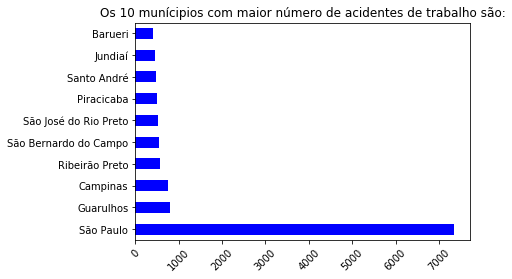

In [214]:
acid_count = df['NOME_MUN'].value_counts(sort=True, ascending=False)[:10]
for i, (index, value) in enumerate(acid_count.items()):
    print('\t{} - Cidade de {} registrou {:,} acidentes.'.format(i+1, index, value))
acid_count.plot.barh(color='blue')
plt.title('Os 10 munícipios com maior número de acidentes de trabalho são:')
plt.xticks(rotation=45)
plt.show()

### 2.Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? Faça um gráfico de barras para apresentar o resultado.

In [19]:
mun_pop = df[['NOME_MUN', 'POPULACAO']].drop_duplicates()
mun_pop['ACID_POR_100MIL'] = 0
mun_pop = mun_pop.set_index('NOME_MUN')

total_acid = (df['NOME_MUN'].value_counts())

final = pd.merge(mun_pop, total_acid, left_on='NOME_MUN', right_index=True)
final = final.rename(columns={'NOME_MUN': 'TOTAL_ACID'})
final['ACID_POR_100MIL'] = round((final['TOTAL_ACID']*100000)/final['POPULACAO'],2)
final = final.sort_values(['ACID_POR_100MIL'],ascending=False)[:10]
print_dataframe(final)


,POPULACAO,ACID_POR_100MIL,TOTAL_ACID
NOME_MUN,,,
Borá,836,598.09,5
Cosmorama,7316,300.71,22
Mendonça,5413,258.64,14
Onda Verde,4339,253.51,11
Pontes Gestal,2577,232.83,6
Suzanápolis,3911,230.12,9
Vista Alegre do Alto,8626,208.67,18
Gavião Peixoto,4762,189.00,9
Ipiguá,5306,188.47,10


### 3.Qual a proporção de acidentes de trabalho em relação a cada estado?

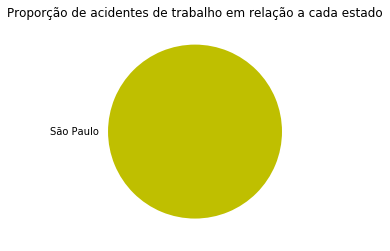

In [20]:
acid_count = df['NOME_UF'].value_counts(sort=True, ascending=False)
##print_dataframe(acid_count)
acid_count.plot.pie(colors = 'yellow')
plt.ylabel('')
plt.title('Proporção de acidentes de trabalho em relação a cada estado')
plt.show()

### 4.Qual a natureza da lesão mais comum nos acidentes?

In [21]:
nat_lesao = (df['NATUREZA_DA_LESAO'].value_counts(sort=True, ascending=False)).idxmax()
nat_lesao_count = (df['NATUREZA_DA_LESAO'].value_counts(sort=True, ascending=False)).max()
print('A natureza da lesão mais frequente é: {}, com {} acidentes registrados.'.format(nat_lesao,nat_lesao_count))


A natureza da lesão mais frequente é: Corte, Laceracao, Fe, com 5715 acidentes registrados.


### 5.Qual é o comportamento do número de acidentes ao longo do tempo? Mostre a evolução do número de acientes utilizando um gráfico de linha.

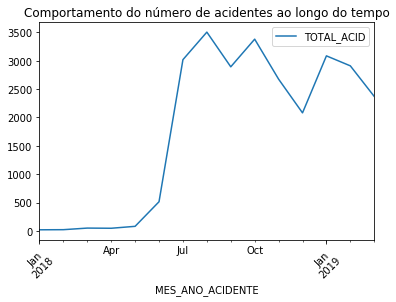

In [189]:
acid_por_data = pd.DataFrame((pd.to_datetime(df['MES_ANO_ACIDENTE'])).sort_values()).drop_duplicates()
acid_por_data = acid_por_data.set_index(['MES_ANO_ACIDENTE'])
acid_por_data ['ORDEM'] = np.arange(0, len(acid_por_data))

acid_count = pd.DataFrame((pd.to_datetime(df['MES_ANO_ACIDENTE'])).value_counts())
acid_tempo = pd.merge(acid_por_data, acid_count, left_on='MES_ANO_ACIDENTE', right_index=True)
acid_tempo = acid_tempo.rename(columns={'MES_ANO_ACIDENTE': 'TOTAL_ACID'})

acid_tempo.plot(y='TOTAL_ACID')
plt.title('Comportamento do número de acidentes ao longo do tempo')
plt.xticks(rotation=45)
plt.show()